In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Load temperature and precipitation datasets
# Assuming they are stored as CSV files
temperature_data = pd.read_csv('/Users/egeberk/Anaconda/Master/Data/PrecipitationDataFrame.csv')
precipitation_data = pd.read_csv('/Users/egeberk/Anaconda/Master/Data/TemperatureDataFrame.csv')

In [2]:
# Merge datasets on Region, Year, and Month
combined_data = pd.merge(
    temperature_data,
    precipitation_data,
    on=['Region', 'Year', 'Month'],
    how='inner'
)

# Save combined data to CSV and Excel
combined_data.to_csv('combined_data.csv', index=False)
combined_data.to_excel('combined_data.xlsx', index=False)

print("Combined dataset saved as 'combined_data.csv' and 'combined_data.xlsx'")


Combined dataset saved as 'combined_data.csv' and 'combined_data.xlsx'


Plot saved to /Users/egeberk/Anaconda/Master/Graphs/Alice_Arm_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plot saved to /Users/egeberk/Anaconda/Master/Graphs/Hastings_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plot saved to /Users/egeberk/Anaconda/Master/Graphs/MountainRatz_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plot saved to /Users/egeberk/Anaconda/Master/Graphs/Juneau_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plot saved to /Users/egeberk/Anaconda/Master/Graphs/Hyder_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plot saved to /Users/egeberk/Anaconda/Master/Graphs/Chickamin_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plot saved to /Users/egeberk/Anaconda/Master/Graphs/Unuk_Mean_Temperature_and_Precipitation_Intensity_Trends.png
Plots with trend lines have been saved to /Users/egeberk/Anaconda/Master/Graphs.


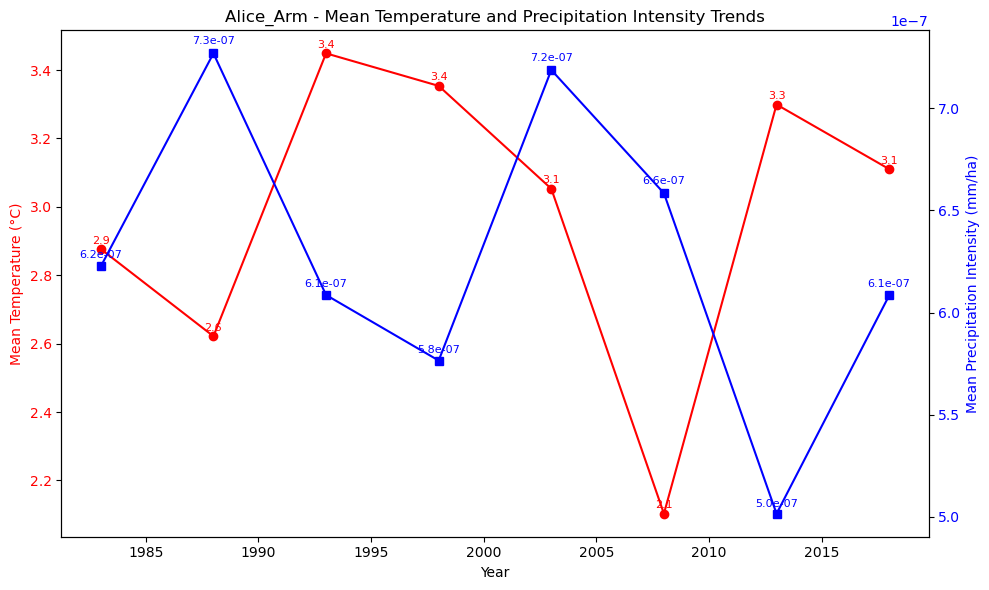

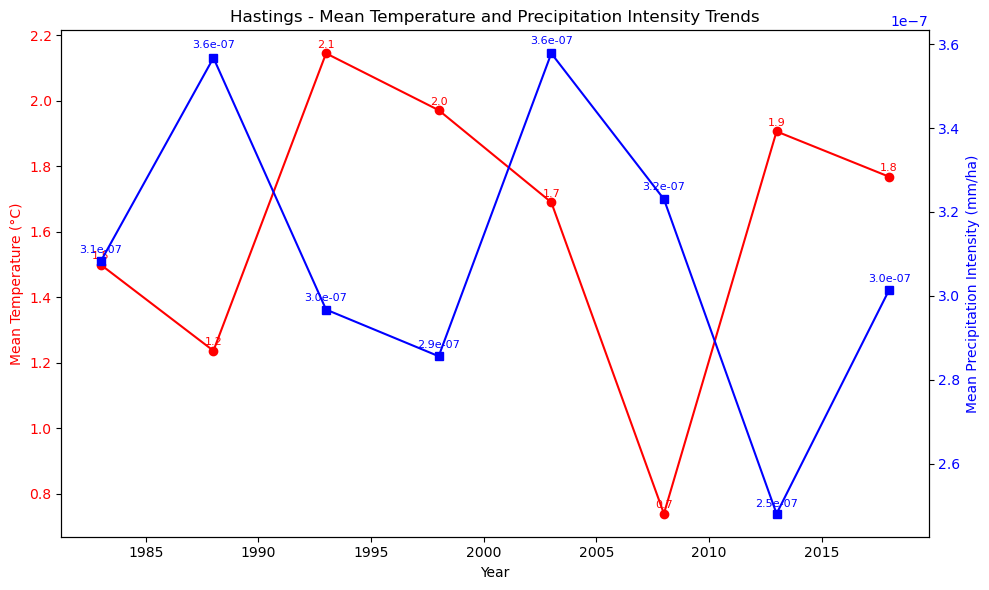

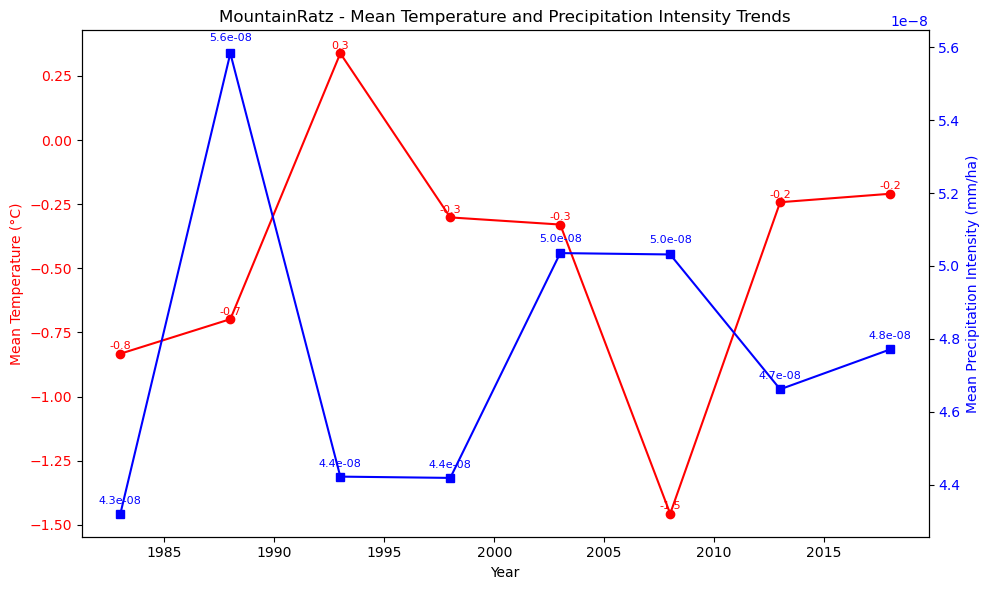

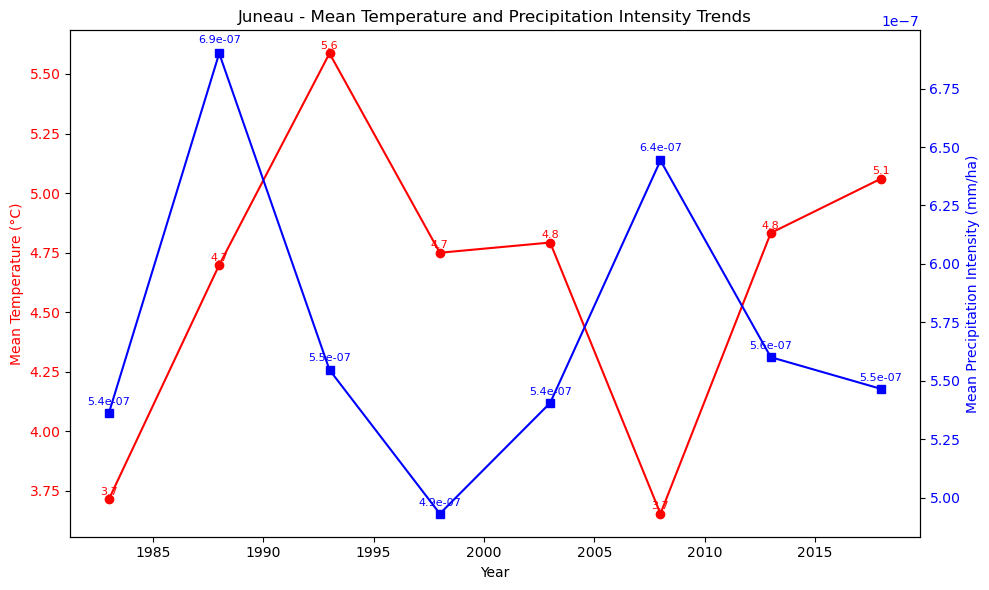

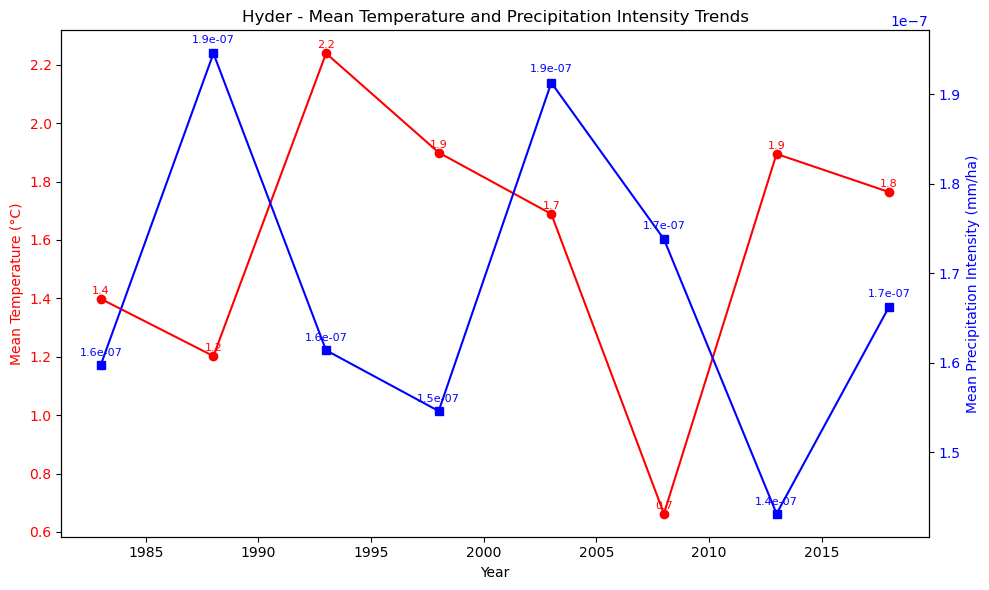

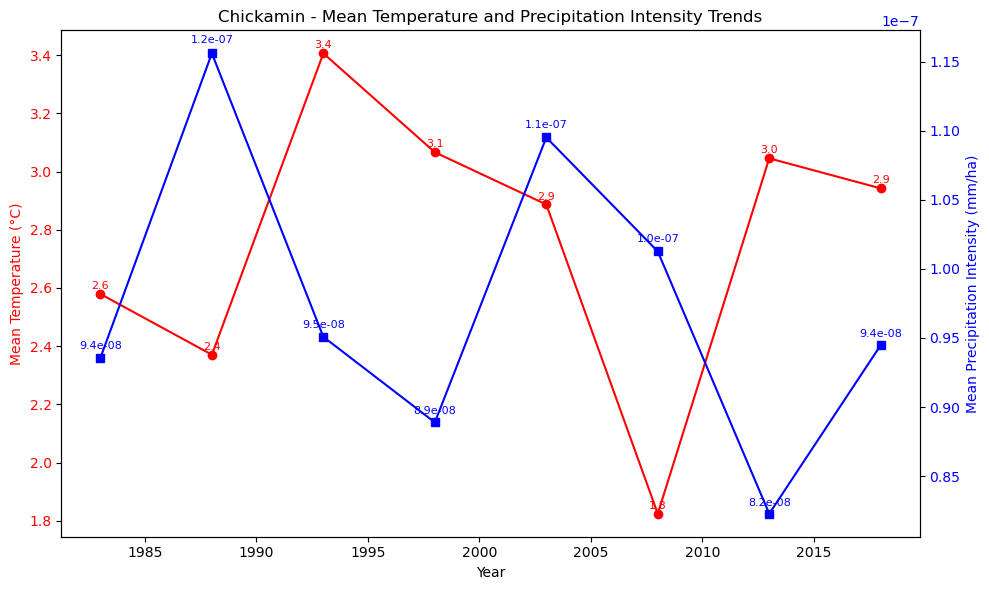

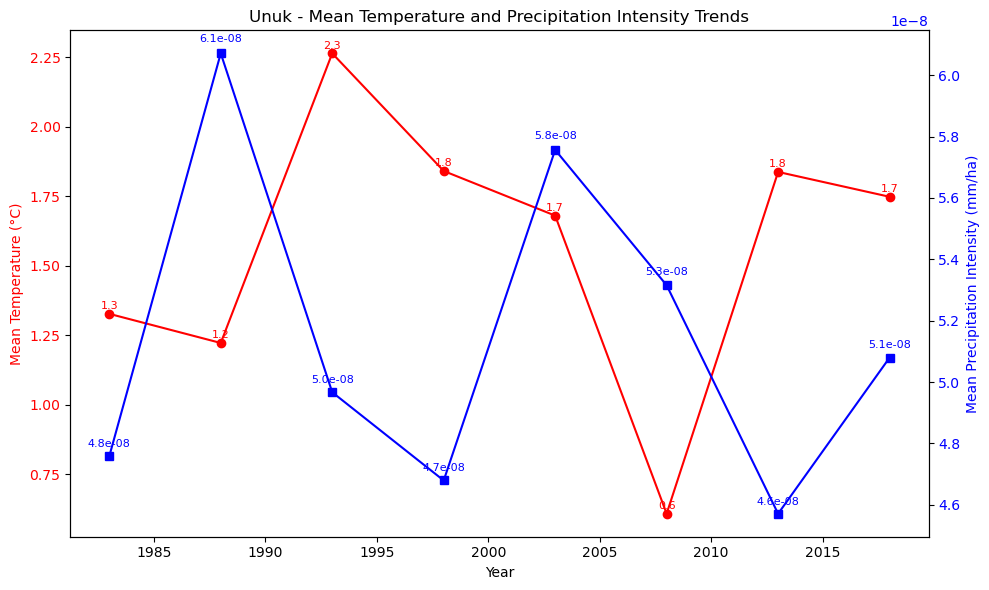

In [3]:
# Update the output directory to the specified path
output_dir = '/Users/egeberk/Anaconda/Master/Graphs'
os.makedirs(output_dir, exist_ok=True)

# Function to plot dual-axis graphs with trend lines and slopes in a color-coded footer
def plot_dual_axis_with_trends(data, region, output_file=None):
    """
    Plot a dual-axis graph for mean precipitation intensity and mean temperature for a given region,
    with trend lines and alpha-style offsets for annotations. Slope values are shown in a color-coded footer.

    Parameters:
        data (DataFrame): The dataset containing temperature and precipitation data.
        region (str): The region to plot.
        output_file (str, optional): File path to save the plot. If None, the plot will be displayed.
    """
    # Filter data for the specified region
    region_data = data[data['Region'] == region]

    # Group data by Year and calculate averages for each year
    yearly_data = region_data.groupby('Year').agg({
        'mean_precipitation_intensity_mm_ha': 'mean',
        'Mean Temperature (°C)': 'mean'
    }).reset_index()

    # # Calculate trend lines
    # temp_slope, temp_intercept, _, _, _ = linregress(yearly_data['Year'], yearly_data['Mean Temperature (°C)'])
    # precip_slope, precip_intercept, _, _, _ = linregress(yearly_data['Year'], yearly_data['mean_precipitation_intensity_mm_ha'])

    # Create the dual-axis plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot mean temperature
    ax1.plot(
        yearly_data['Year'],
        yearly_data['Mean Temperature (°C)'],
        color='red',
        marker='o',
        label='Mean Temperature (°C)'
    )
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Mean Temperature (°C)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # # Add temperature trend line
    # ax1.plot(
    #     yearly_data['Year'],
    #     temp_slope * yearly_data['Year'] + temp_intercept,
    #     color='red',
    #     linestyle='--'
    # )

    # Add temperature annotations with fixed alpha-style offset
    for x, y in zip(yearly_data['Year'], yearly_data['Mean Temperature (°C)']):
        ax1.text(x, y + 0.01, f'{y:.1f}', color='red', fontsize=8, ha='center', va='bottom')

    # Plot mean precipitation intensity
    ax2 = ax1.twinx()
    ax2.plot(
        yearly_data['Year'],
        yearly_data['mean_precipitation_intensity_mm_ha'],
        color='blue',
        marker='s',
        label='Mean Precipitation Intensity (mm/ha)'
    )
    ax2.set_ylabel('Mean Precipitation Intensity (mm/ha)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # # Add precipitation trend line
    # ax2.plot(
    #     yearly_data['Year'],
    #     precip_slope * yearly_data['Year'] + precip_intercept,
    #     color='blue',
    #     linestyle='--'
    # )

    # Add precipitation annotations with proportional alpha-style offset
    for x, y in zip(yearly_data['Year'], yearly_data['mean_precipitation_intensity_mm_ha']):
        ax2.text(x, y + (y * 0.005), f'{y:.1e}', color='blue', fontsize=8, ha='center', va='bottom')

    # Add footer with color-coded slope values
    # fig.text(
    #     0.5, 0.01,  # Position in the bottom center
    #     f"Temperature Trend: Slope = {temp_slope:.2e}°C/year",
    #     fontsize=10, ha='center', va='center', color='red',
    #     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    #  )
    # fig.text(
    #     0.5, -0.03,  # Position below the first footer text
    #     f"Precipitation Trend: Slope = {precip_slope:.2e} mm/ha/year",
    #     fontsize=10, ha='center', va='center', color='blue',
    #     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    # )

    plt.title(f'{region} - Mean Temperature and Precipitation Intensity Trends')
    fig.tight_layout()

    # Save or show the plot
    if output_file:
        plt.savefig(output_file, bbox_inches="tight")
        print(f"Plot saved to {output_file}")
    else:
        plt.show()

# Generate and save plots for each region
for region in combined_data['Region'].unique():
    # Construct proper descriptive filenames
    output_file = os.path.join(
        output_dir,
        f"{region.replace(' ', '_')}_Mean_Temperature_and_Precipitation_Intensity_Trends.png"
    )
    plot_dual_axis_with_trends(combined_data, region, output_file=output_file)

print(f"Plots with trend lines have been saved to {output_dir}.")


Grid view plot saved to /Users/egeberk/Anaconda/Master/Graphs/Regions_Comparison_Grid_View_Annotated.png


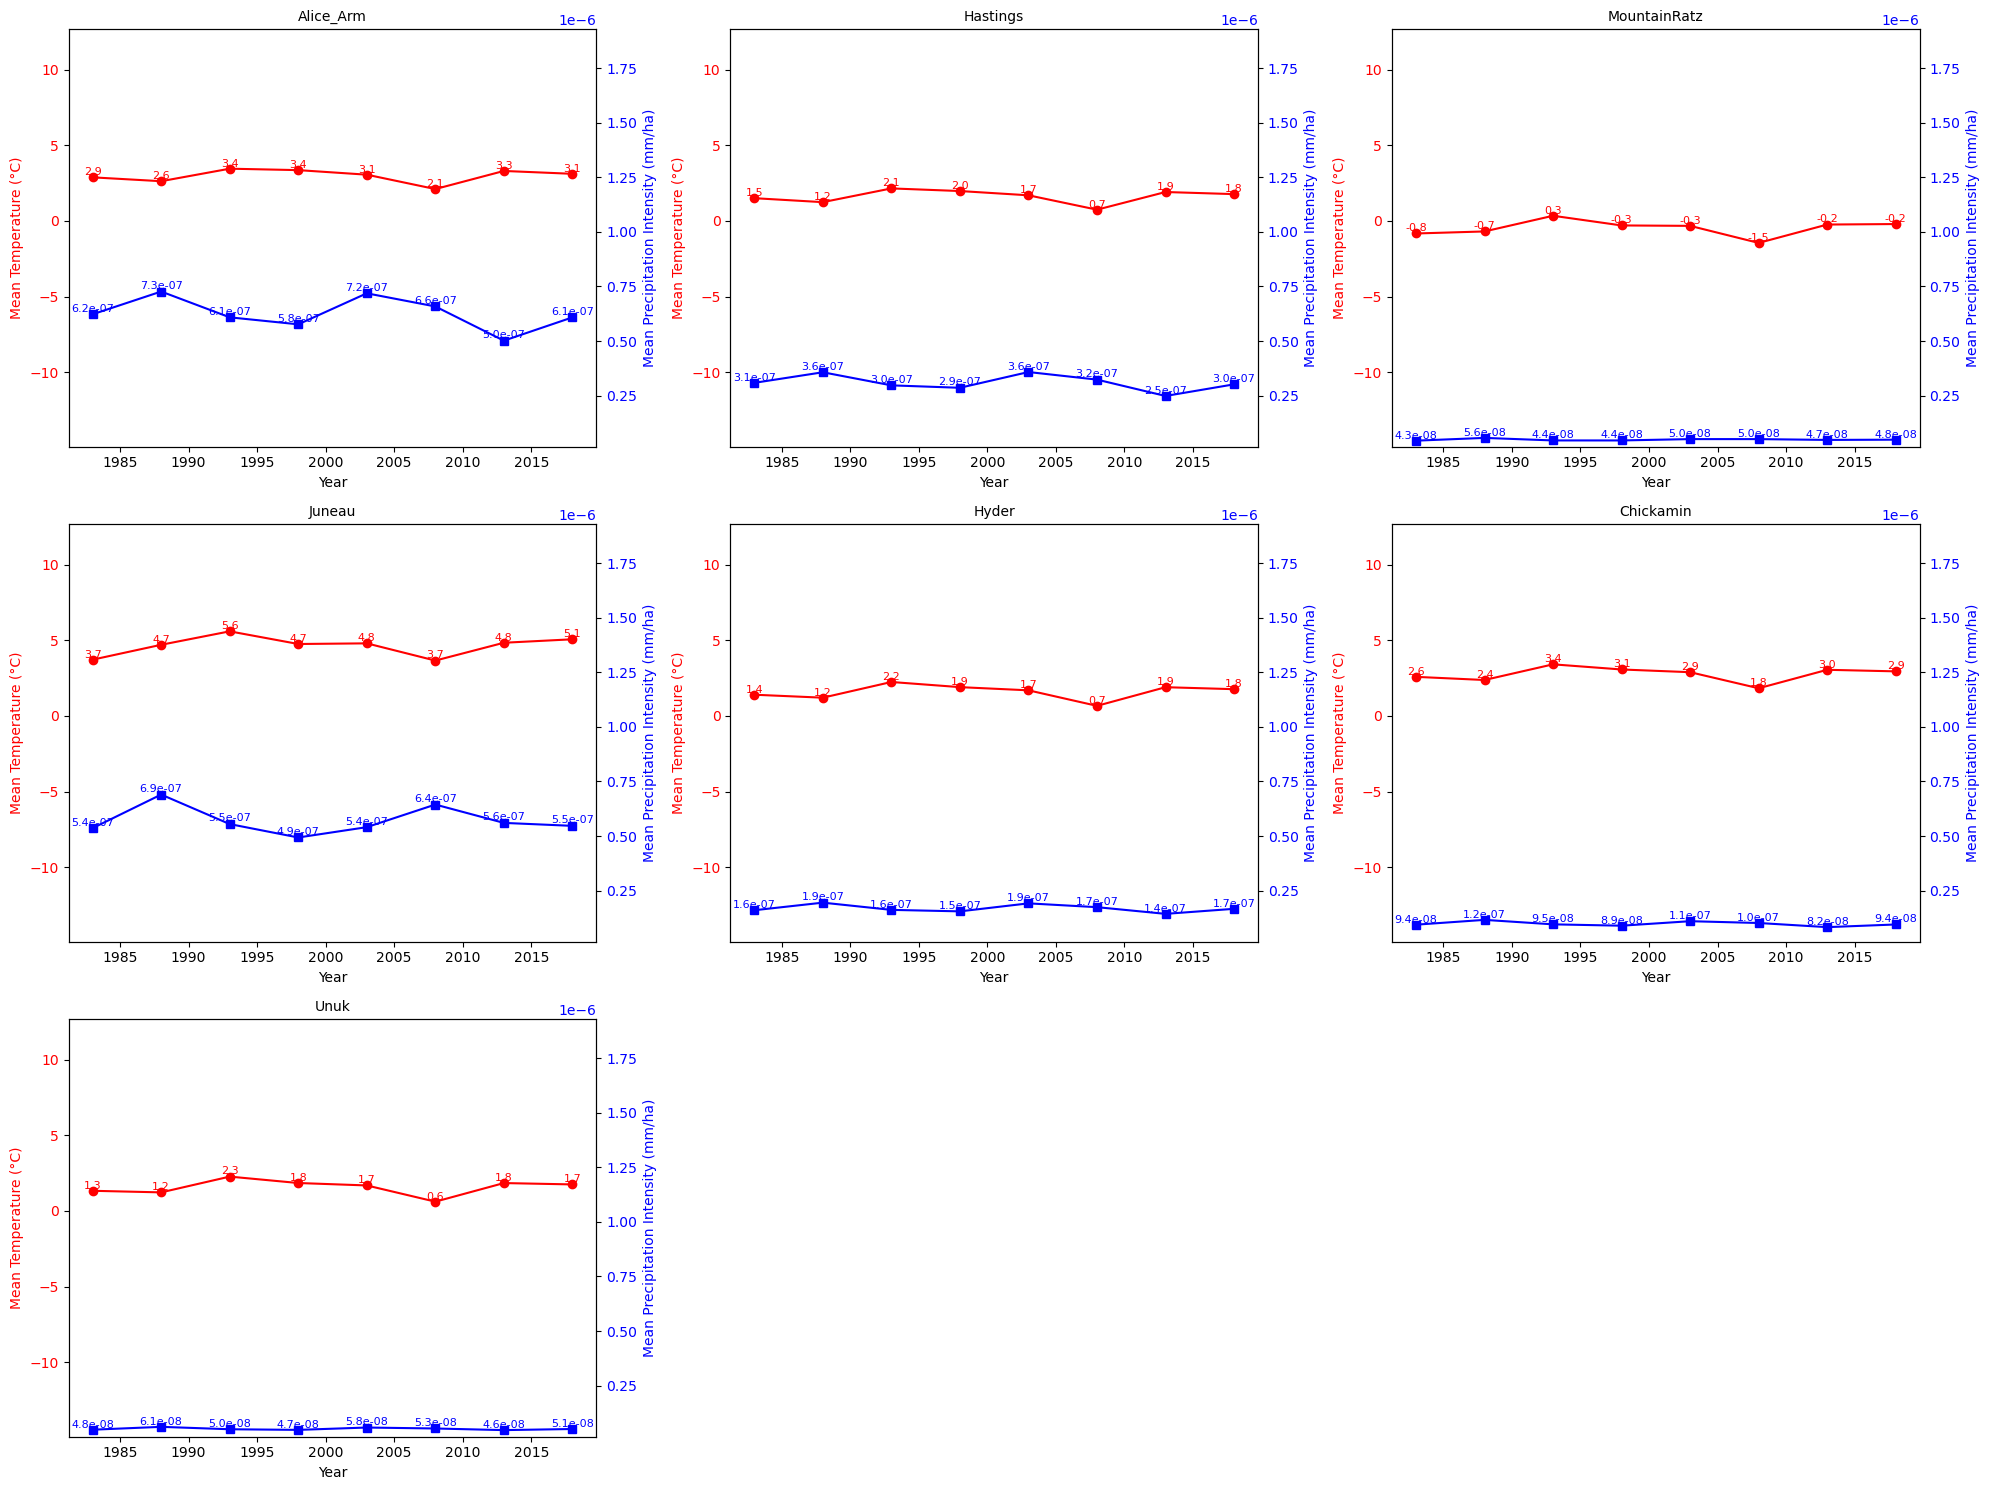

In [4]:
def plot_grid_view_with_annotations(data, output_file=None):
    """
    Plot a grid view of dual-axis graphs for all regions with trend lines, slopes, and unified axis limits.

    Parameters:
        data (DataFrame): The dataset containing temperature and precipitation data.
        output_file (str, optional): File path to save the grid plot. If None, the plot will be displayed.
    """
    # Get all unique regions
    regions = data['Region'].unique()
    num_regions = len(regions)
    grid_cols = 3  # Number of columns in the grid
    grid_rows = (num_regions + grid_cols - 1) // grid_cols  # Calculate required rows

    # Set unified y-axis limits
    temp_min, temp_max = data['Mean Temperature (°C)'].min(), data['Mean Temperature (°C)'].max()
    precip_min, precip_max = data['mean_precipitation_intensity_mm_ha'].min(), data['mean_precipitation_intensity_mm_ha'].max()

    # Create the grid of subplots
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, grid_rows * 5), squeeze=False)
    axes = axes.flatten()

    for i, region in enumerate(regions):
        ax1 = axes[i]

        # Filter data for the region
        region_data = data[data['Region'] == region]

        # Group data by Year and calculate averages for each year
        yearly_data = region_data.groupby('Year').agg({
            'mean_precipitation_intensity_mm_ha': 'mean',
            'Mean Temperature (°C)': 'mean'
        }).reset_index()

        # # Calculate trend lines
        # temp_slope, temp_intercept, _, _, _ = linregress(yearly_data['Year'], yearly_data['Mean Temperature (°C)'])
        # precip_slope, precip_intercept, _, _, _ = linregress(yearly_data['Year'], yearly_data['mean_precipitation_intensity_mm_ha'])

        # Plot mean temperature on the primary y-axis
        ax1.plot(
            yearly_data['Year'],
            yearly_data['Mean Temperature (°C)'],
            color='red',
            marker='o',
            label='Mean Temperature (°C)'
        )
        # ax1.plot(
        #     yearly_data['Year'],
        #     temp_slope * yearly_data['Year'] + temp_intercept,
        #     color='red',
        #     linestyle='--'
        # )
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Mean Temperature (°C)', color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        ax1.set_ylim(temp_min, temp_max)

        # Add temperature annotations
        for x, y in zip(yearly_data['Year'], yearly_data['Mean Temperature (°C)']):
            ax1.text(x, y + 0.01, f'{y:.1f}', color='red', fontsize=8, ha='center', va='bottom')

        # Plot mean precipitation intensity on the secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(
            yearly_data['Year'],
            yearly_data['mean_precipitation_intensity_mm_ha'],
            color='blue',
            marker='s',
            label='Mean Precipitation Intensity (mm/ha)'
        )
        # ax2.plot(
        #     yearly_data['Year'],
        #     precip_slope * yearly_data['Year'] + precip_intercept,
        #     color='blue',
        #     linestyle='--'
        # )
        ax2.set_ylabel('Mean Precipitation Intensity (mm/ha)', color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')
        ax2.set_ylim(precip_min, precip_max)

        # Add precipitation intensity annotations
        for x, y in zip(yearly_data['Year'], yearly_data['mean_precipitation_intensity_mm_ha']):
            ax2.text(x, y + (y * 0.005), f'{y:.1e}', color='blue', fontsize=8, ha='center', va='bottom')

        # Add a title to the subplot
        ax1.set_title(region, fontsize=10)

        # # Add color-coded slope footers below each subplot
        # ax1.text(
        #     0.5, -0.15,
        #     f"Temperature Trend: Slope = {temp_slope:.2e}°C/year",
        #     fontsize=8, ha='center', va='center', color='red',
        #     transform=ax1.transAxes,
        #     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        # )
        # ax1.text(
        #     0.5, -0.19,  # Adjusted for consistent distance
        #     f"Precipitation Trend: Slope = {precip_slope:.2e} mm/ha/year",
        #     fontsize=8, ha='center', va='center', color='blue',
        #     transform=ax1.transAxes,
        #     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        # )

    # Remove unused subplots
    for i in range(len(regions), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()

    # Save or display the grid view
    if output_file:
        plt.savefig(output_file, bbox_inches="tight")
        print(f"Grid view plot saved to {output_file}")
    else:
        plt.show()

# Output file for the grid view with annotations
grid_output_file_with_annotations = os.path.join(output_dir, "Regions_Comparison_Grid_View_Annotated.png")

# Generate and save the grid view plot with annotations
plot_grid_view_with_annotations(combined_data, output_file=grid_output_file_with_annotations)
